In [4]:
import torch
from torch.utils.data import DataLoader
from generate_data import generate_test_data, decoder, generate_biased_data
import deqmodel
import basemodel
import naivemodel
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
data = generate_biased_data()

((3/2*3/2-4*7-3))*(((8/3)-3+1))
((1-8*((1-6-3-8/9)-2-3/(2-8))))
7-4-6-4*3-4-8*(3-2)-(9*9+6-5*9)
((7-1-2+8-(8-6)-6-1-2/3*(5-6)))
((9-6))*(((7-2*5)))/(9*5-1/7-8)
(((((1+3))))-9-7-(9+8*8/6-2-8))
((((8/9)))/(1/7)+((1+3-(5-2))))
((((3-9-6)*6/3-2))+((3-3-1-4)))
((7-2*7-8/4-6-2))-1-7/5-(7/4-5)
9/(8-2-9/5-9-5)-2/3-5-6-2+5-5+1
(9*2-3-(2+5+(2-2)*((2*9*2-7))))
(8*9+(5-6))*(6/7-6*5-((7-9-6)))
((5-8+3*(9+(8+8))))-(7/5/6)*8+7
(7*3+4-6)*8-8-2/3+4-2-1-3-4/1*4
9-3/2-7-4/1/7+5+8-4-4/6-5-6-9-5
6-3*3/5-5-((((1-7-(8-1)*8*8))))
((((2*2)))/4-3-2)-(6+7-(5-3-5))
(9*1*8-9*4*8*8-((2-3*6-(2-1))))
((5-3))-(((8+6*8-(6-1)))-8+6*1)
3-8-(3*6)/2+2+1+((3-3+6-4)-1+4)
(((((1+8-6-9+(7*2-2-6))))))*5-4
3/9+7-(((1-(3-1)))-8*9)-(6*8-3)
(((5-5*7-1-7+4-(2*7))-5*2*9+2))
2*1+2/5-3+(9-5)+9*7-7-(1-(6*3))
(7*1-5-8*((5-4))-1*8/8+9/1-4-2)
3-8-(4*9-4-3+4/1+(6-4))*(5*2*4)
6-7+4-7-(((2*7-9)-5/9)-2+1+3-5)
((1*5)-6-(3-9)+5-4-(6+3)-(1-3))
(3/3*5+8+4*1*6-6)-6-8*(2-8)/9-5
(1-8-9)-5+6/8-9-3*1-3-4-9-5-1+8
(1-2)-3*5-8-8-2*7+5/((3*3))-4+9
(9*1-8-7

In [7]:
def stats(X, y, pred):
    tp, tn, fp, fn = 0, 0, 0, 0
    fp_expr, fn_expr = [], []
    for i in range(len(y)):
        if pred[i] == 1:
            if pred[i] == y[i]:
                tp += 1
            else:
                fp += 1
                fp_expr.append(decoder(X[i]))
        else:
            if pred[i] == y[i]:
                tn += 1
            else:
                fn += 1
                fn_expr.append(decoder(X[i]))
    cf_matrix = np.array([[tn, fp], [fn, tp]])
    return cf_matrix, fp_expr, fn_expr

In [8]:
def getStats(modeltype, data):
    
    mydataloader = DataLoader(data, batch_size=len(data))
    for feats, labels in mydataloader:
        X = feats.to(device).float()
        y = labels.to(device).float()
    try:
        name = modeltype.__name__
    except:
        name = 'mlmodel'
    state = torch.load(f"{name}.pth")
    if name == 'basemodel':
        print('this works')
        model = basemodel.NeuralNetwork().to(modeltype.device)
        model.load_state_dict(state)
        model.eval()
        with torch.no_grad():
            pred, hidden = model(X)
    elif name == 'naivemodel':
        model = naivemodel.NeuralNetwork().to(modeltype.device)
        model.load_state_dict(state)
        model.eval()
        with torch.no_grad():
            pred = model(X)
    elif name == 'deqmodel':
        model = deqmodel.NeuralNetwork().to(modeltype.device)
        model.load_state_dict(state)
        model.eval()
        with torch.no_grad():
            pred = model(X)
    else:
        model = basemodel.NeuralNetwork(num_layers = 3).to(basemodel.device)
        model.load_state_dict(state)
        model.eval()
        with torch.no_grad():
            pred, hidden = model(X)
        
               
    bool_arr = pred > 0
    prediction = torch.Tensor([1 if x else 0 for x in bool_arr]).to(device)
    return stats(X,y, prediction)


In [9]:
cf_matrix, fpx, fnx = getStats("mlmodel", data)
cf_matrix1, fpx1, fnx1 = getStats("basemodel", data)
cf_matrix2, fpx2, fnx2 = getStats("deqmodel", data)
cf_matrix3, fpx3, fnx3 = getStats("naivemodel", data)

In [10]:
def getMetric(cf):
    precision = cf[1,1]/(cf[1,1] + cf[0,1])
    recall = cf[1,1]/(cf[1,1] + cf[1,0])
    return precision, recall

In [11]:
def plot_confusion_matrix(cf_matrix, title):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
    ax.set_title(title);
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

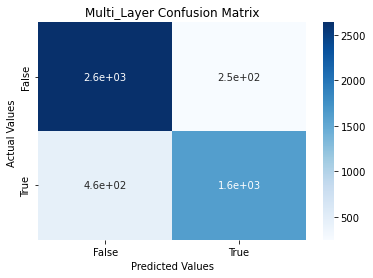

0.8679549114331723 0.7796528447444552


In [12]:
plot_confusion_matrix(cf_matrix, "Multi_Layer Confusion Matrix")
precision, recall = getMetric(cf_matrix)
print(precision, recall)

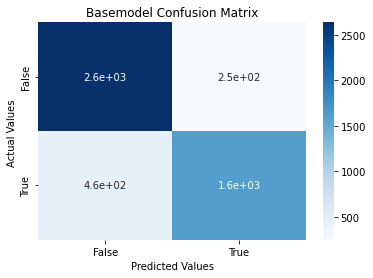

0.8679549114331723 0.7796528447444552


In [15]:
plot_confusion_matrix(cf_matrix1, "Basemodel Confusion Matrix")
precision1, recall1 = getMetric(cf_matrix1)
print(precision1, recall1)

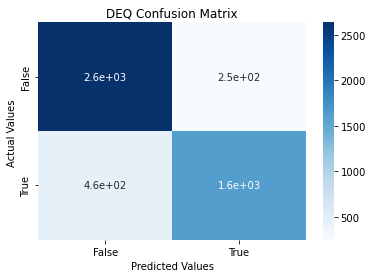

0.8679549114331723 0.7796528447444552


In [16]:
plot_confusion_matrix(cf_matrix2, "DEQ Confusion Matrix")
precision, recall = getMetric(cf_matrix2)
print(precision, recall)

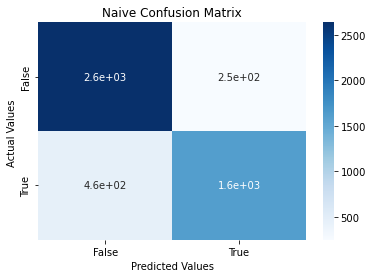

0.8679549114331723 0.7796528447444552


In [17]:
plot_confusion_matrix(cf_matrix3, "Naive Confusion Matrix")
precision, recall = getMetric(cf_matrix3)
print(precision, recall)